# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [89]:
# your answer here


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from scipy import stats

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [272]:
# your answer here

employee = pd.read_csv(r"C:\Users\dulce\OneDrive\Documentos\Ironhack git\Labs\Labs week 4\lab-pivot-table-and-correlation\your_code\data\Employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [273]:
employee.columns

Index(['Name', 'Department', 'Education', 'Gender', 'Title', 'Years',
       'Salary'],
      dtype='object')

#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [274]:
# Method 1

print(employee.groupby('Department').agg({'Salary': 'mean'}))

            Salary
Department        
HR           45.00
IT           48.75
Sales        55.00


In [275]:
# Method 2

data = employee.pivot_table(index = ['Department'], values = ['Salary'], aggfunc = ['mean'])
data

,mean
,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [278]:
# your answer here

pivot_table = employee.pivot_table(values ='Salary', index= ['Department', 'Title'], aggfunc= ['mean'])
pivot_table

mean
                     Salary
Department Title           
HR         VP          70.0
           analyst     32.5
IT         VP          70.0
           analyst     32.5
           associate   60.0
Sales      associate   55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [284]:
# your answer here

pivot_table_years = pd.pivot_table(employee, values='Salary', index='Title', columns='Years', aggfunc='mean')

pivot_table_years

Years,1,2,3,4,7,8
Title,,,,,,
VP,NaN,NaN,NaN,NaN,NaN,70.0
analyst,35.0,30.0,NaN,35.0,NaN,NaN
associate,NaN,55.0,55.0,NaN,60.0,NaN


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [300]:
# your answer here

pivot_table_salary = pd.pivot_table(employee, values='Salary', index=['Department', 'Title'], aggfunc={'Salary': 'mean', 'Title': 'count'})

pivot_table_salary = pivot_table_salary_employees.rename(columns={'Salary': 'Mean Salary', 'Title': 'Number of Employees'})

pivot_table_salary

Mean Salary  Number of Employees
Department Title                                      
HR         VP                70.0                    1
           analyst           32.5                    2
IT         VP                70.0                    1
           analyst           32.5                    2
           associate         60.0                    1
Sales      associate         55.0                    2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [303]:
# your answer here

salary_statistics = pd.pivot_table(employee, values='Salary', index = ['Department', 'Title'],aggfunc = ['median', 'min', 'max', 'std'])

salary_statistics

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [319]:
# your answer here

mean_salary = employee.groupby(['Department', 'Title'])['Salary'].mean()

salary_statistics = salary_statistics.fillna(mean_salary)

salary_statistics

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70      mean
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70      mean
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60      mean
Sales      associate   55.0     55     55       0.0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [336]:
# your answer here

employees_per_department = employee.groupby('Department')['Title'].count()

total_salary_per_department = employee.groupby('Department')['Salary'].sum()

department_data = pd.DataFrame({'Number of Employees': employees_per_department,
                                   'Total Salary Expenditure': total_salary_per_department})

department_data

,Number of Employees,Total Salary Expenditure
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [331]:
# your answer here

summary_employees = employee.groupby(['Department', 'Title']).agg({'Years': 'sum', 'Salary': 'mean'})

summary_employees

Total Years of Work Experience  Mean Salary
Department Title                                                 
HR         VP                                      8         70.0
           analyst                                 6         32.5
IT         VP                                      8         70.0
           analyst                                 3         32.5
           associate                               7         60.0
Sales      associate                               5         55.0

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [326]:
# your answer here

def mean_withouut_max(salary_column):
    return salary_column[salary_column < salary_column.max()].mean()

pivot_table_mean_salary = pd.pivot_table(employee, values = 'Salary', index='Department', aggfunc = mean_without_max)

pivot_table_mean_salary

,Salary
Department,
HR,32.500000
IT,41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [155]:
# your answer here

fitbit = pd.read_csv(r"C:\Users\dulce\OneDrive\Documentos\Ironhack git\Labs\Labs week 4\lab-pivot-table-and-correlation\your_code\data\Fitbit.csv")
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [156]:
# your answer here

fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [115]:
# your answer here

fitbit.mean()
fitbit.mode()
fitbit.std()
fitbit.skew()

C:\Users\dulce\AppData\Local\Temp\ipykernel_26340\1596765900.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fb.mean()
C:\Users\dulce\AppData\Local\Temp\ipykernel_26340\1596765900.py:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fb.std()
C:\Users\dulce\AppData\Local\Temp\ipykernel_26340\1596765900.py:6: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify 

Calorie burned           -1.827297
Steps                     0.016043
Distance                  0.425020
Floors                    2.969491
Minutes Sedentary        -1.067336
Minutes Lightly Active    0.123888
Minutes Fairly Active     0.562410
Minutes Very Active       0.975634
Activity Calories         2.446438
MinutesOfSleep           -0.799806
MinutesOfBeingAwake       0.048492
NumberOfAwakings          0.039823
LengthOfRestInMinutes    -0.819726
dtype: float64

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [129]:
# your answer here

display(fitbit['Minutes Very Active'])
display(fitbit['Steps'])

fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062609

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

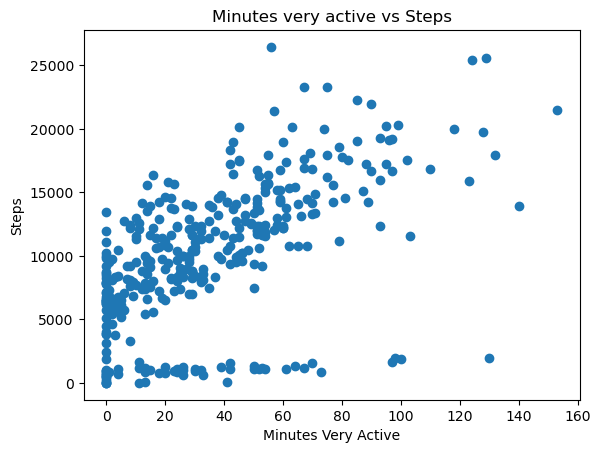

In [251]:
x = 'Minutes Very Active'
y = 'Steps'

plt.scatter(x = fitbit['Minutes Very Active'], y = fitbit['Steps'])

plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.title('Minutes very active vs Steps')

plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here

# The scatter plot provides a visual understanding of the relationship between "Minutes Very Active" and "Steps,"
# showing that, in general, more active minutes tend to be associated with more steps taken. 
# As "Minutes Very Active" increases, the the "Steps" increase as well.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [134]:
# your answer here

display(fitbit['Minutes Sedentary'])
display(fitbit['Steps'])

fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0        1.355
1      611.000
2      602.000
3      749.000
4      876.000
        ...   
362    599.000
363    684.000
364    701.000
365    575.000
366    564.000
Name: Minutes Sedentary, Length: 367, dtype: float64

0        905
1      18925
2      14228
3       6756
4        502
       ...  
362    18588
363    16382
364    21913
365    19023
366     9526
Name: Steps, Length: 367, dtype: int64

0.07690608062990095

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

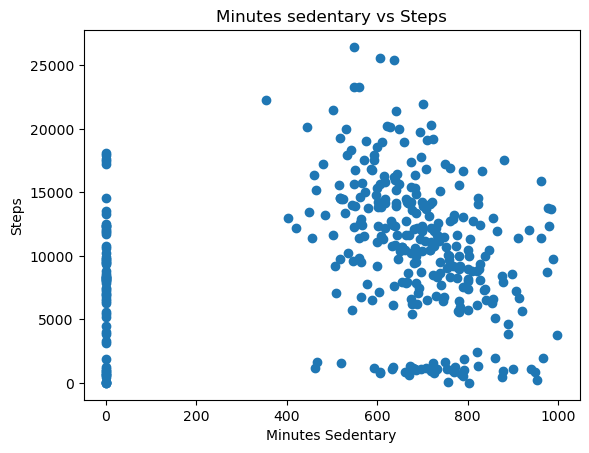

In [252]:
# your answer here

x = 'Minutes Sedentary'
y = 'Steps'

plt.scatter(x = fitbit['Minutes Sedentary'], y = fitbit['Steps'])

plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.title('Minutes sedentary vs Steps')

plt.show()


# There's a weak relationshipo between the 2 of them, its close to zero, but there is a little correlation 
# between both. But we can not afirm that spending more time being sedentary will affect the number of steps.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [141]:
# your answer here

display(fitbit['MinutesOfSleep'])
display(fitbit['Steps'])

fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0      384
1      454
2      387
3      311
4      407
      ... 
362    377
363    406
364    280
365    370
366    502
Name: MinutesOfSleep, Length: 367, dtype: int64

0        905
1      18925
2      14228
3       6756
4        502
       ...  
362    18588
363    16382
364    21913
365    19023
366     9526
Name: Steps, Length: 367, dtype: int64

0.13098565950836383

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

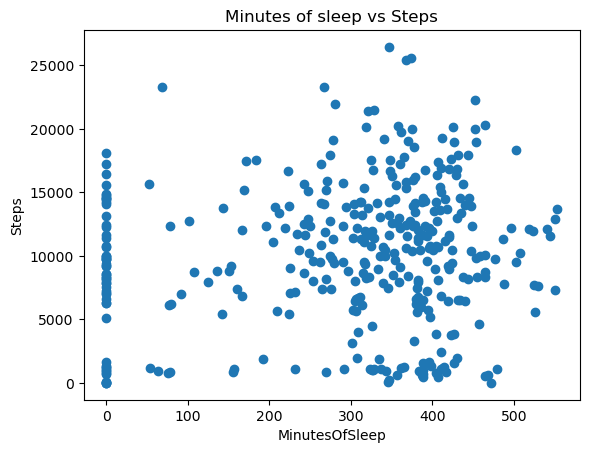

In [253]:
# your answer here

x = 'MinutesOfSleep'
y = 'Steps'

plt.scatter(x = fitbit['MinutesOfSleep'], y = fitbit['Steps'])

plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.title('Minutes of sleep vs Steps')

plt.show()

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [157]:
# your answer here

columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

subset_fb = fitbit[columns_to_select]

cor_fit = subset_fb.corr()

print(cor_fit)

                     Calorie burned     Steps    Floors  Minutes Sedentary  \
Calorie burned             1.000000  0.255305  0.130757           0.125353   
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000  


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [152]:
# your answer here

steps_correlation = fitbit['Steps']

steps_correlation_sorted = steps_correlation.sort_values(ascending=False)

print(steps_correlation_sorted)

36     26444
357    25571
314    25385
206    23313
335    23286
       ...  
261       39
81        10
326        0
229        0
311        0
Name: Steps, Length: 367, dtype: int64


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [228]:
# your answer here


time_grades = pd.read_csv(r"C:\Users\dulce\OneDrive\Documentos\Ironhack git\Labs\Labs week 4\lab-pivot-table-and-correlation\your_code\data\Time_Grades.csv")
time_grades

df = time_grades
df

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

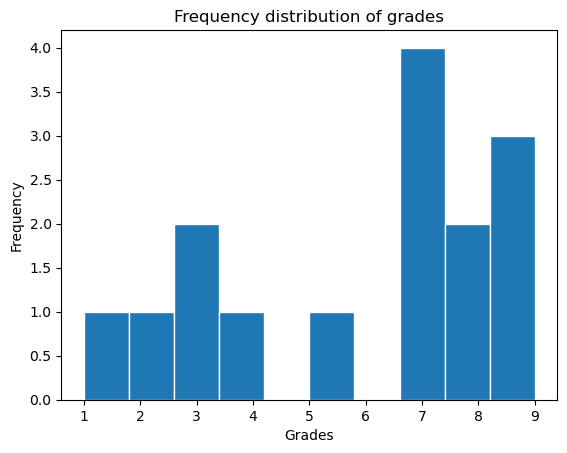

In [249]:
# your answer here

grades = df['Grade']

plt.hist(grades, edgecolor='white')

plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.title('Frequency distribution of grades')

plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [339]:
# your answer here

print('Pearson correlation:', stats.pearsonr(df['Study time'], df['Grade'])[0])
print('Spearman correlation:', stats.spearmanr(df['Study time'], df['Grade'])[0])

# Both correlations are high, meaning based on both, it is possible understand that there is a 'positive' relationship 
# between the time that is spended studying with having better grades..

Pearson correlation: 0.7980456073578859
Spearman correlation: 0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

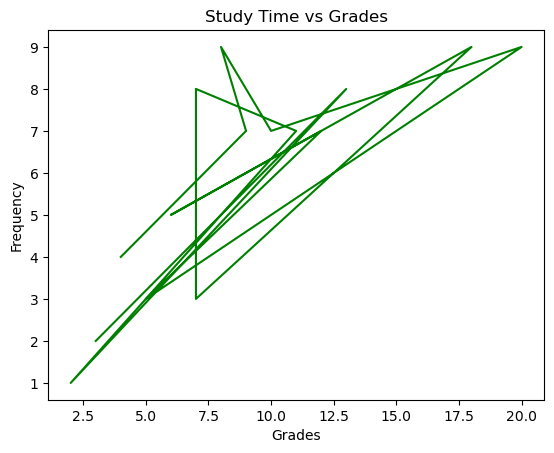

In [250]:
# your answer here

plt.plot(df['Study time'], df['Grade'], color = 'green')

plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.title('Study Time vs Grades')

plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here

# The difference between Pearson and Spearman correlatin is that one is used 
# to show linear relantionship between two variables(Person), how they move together in a straight line, 
# being more sensitive to outliers and my lead to wrong conclusions. The other does not look for that 
# linear relantionship(Spearman) but measure how closely two variables change together.